# Sentiment Analysis

# By Mahesh S Valanju

### 1) Import Libraries

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#nltk.downloader.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

### 2) Authentication

In [2]:
consumerKey = 'ehe4OytjEN4UVePOumtIXC3if'
consumerSecret = 'XmRUfI0y3Elv2lZRkCqZurQ02ELqw89TjEWbAi0qtyAvhjEy9i'
accessToken = '2581071060-fW6Osch5ouWhepXWdgPZu7bPktaBRL1RTE3YZdK'
accessTokenSecret = 'vFftMfU6UYJ3z9FqzliEIk9dQsvvy19UjoRAq67AQ0vVN'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

### 3) Sentiment Analysis

In [3]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))

tweets = tweepy.Cursor(api.search, q=keyword, lang="en").items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets: 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
            
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
        
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
print(positive)
print(negative)
print(neutral)
print(polarity)

Please enter keyword or hashtag to search: #amazon
Please enter how many tweets to analyze: 1000
43.2
12.6
44.2
10.173711370226979


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1000
positive number:  432
negative number:  126
neutral number:  442


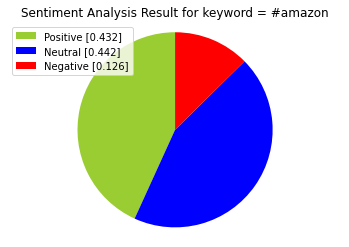

In [5]:
#Creating PieCart
labels = ['Positive ['+str(len(positive_list)/len(tweet_list))+']' , 'Neutral ['+str(len(neutral_list)/len(tweet_list))+']','Negative ['+str(len(negative_list)/len(tweet_list))+']']
sizes = [len(positive_list), len(neutral_list), len(negative_list)]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword = '+keyword+'' )
plt.axis('equal')
plt.show()

In [6]:
tweet_list

,0
0,🔥 AMAZON : PowerColor Radeon RX 6800 XT RED DR...
1,RT @InspireNCelebr8: AD: Love learning #beauty...
2,RT @reviews_chat: **FREE CHROME EXTENSION** Re...
3,RT @RaelleLogan1: One Woman Holds the Destinie...
4,Software Development Engineer\nfrom Amazon\n#A...
...,...
995,RT @Joyster2012: I've written 16 #books in var...
996,RT @EasywaySecure: We don't look into our pock...
997,@proudhufflebook #Found A desert island romanc...
998,join!!\nhttps://t.co/bI2zxjSF1z\n#amazon #fash...


### 4) Cleaning Tweets

In [7]:
tweet_list.drop_duplicates(inplace = True)

In [8]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
#rt = lambda x: re.sub('(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',x)
rt = lambda x: re.sub('(@[0–9]+)|([0-9 \t])|(\w+:\/\/\S+)',' ',x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,🔥 AMAZON : PowerColor Radeon RX 6800 XT RED DR...,🔥 amazon : powercolor radeon rx xt red dr...
1,RT @InspireNCelebr8: AD: Love learning #beauty...,ad: love learning #beauty secrets? watch my r...
2,RT @reviews_chat: **FREE CHROME EXTENSION** Re...,**free chrome extension** reviews chat helps ...
3,RT @RaelleLogan1: One Woman Holds the Destinie...,one woman holds the destinies of two vicious ...
4,Software Development Engineer\nfrom Amazon\n#A...,software development engineer\nfrom amazon\n#a...
5,🔥 AMAZON : MSI GeForce RTX 3060 VENTUS 3X OC\n...,🔥 amazon : msi geforce rtx ventus x oc\n...
8,🔥 AMAZON : ASUS GeForce RTX 3080 Ti ROG STRIX ...,🔥 amazon : asus geforce rtx ti rog strix ...
9,🔥 AMAZON : XFX Speedster MERC319 Radeon RX 690...,🔥 amazon : xfx speedster merc radeon rx ...
10,Were gearing up for a HUGE Q4 here on board th...,were gearing up for a huge q here on board th...
11,"Explore Health, Household and Baby Care produc...","explore health, household and baby care produc..."


In [9]:
tw_list['text'].head(50)

0     🔥 amazon : powercolor radeon rx      xt red dr...
1      ad: love learning #beauty secrets? watch my r...
2      **free chrome extension** reviews chat helps ...
3      one woman holds the destinies of two vicious ...
4     software development engineer\nfrom amazon\n#a...
5     🔥 amazon : msi geforce rtx      ventus  x oc\n...
8     🔥 amazon : asus geforce rtx      ti rog strix ...
9     🔥 amazon : xfx speedster merc    radeon rx    ...
10    were gearing up for a huge q  here on board th...
11    explore health, household and baby care produc...
12     not really surprised. this is how sorry the s...
13    conditioner by white hot luminous conditioner ...
14    my fingers twitched at my sides like a junkie ...
15     "...i thought this was a zombie story. surpri...
16    #affiliatemarketing #affiliates #affiliateprog...
17    #linkedin #twitter #facebook #instagram #doge ...
18    #tumblr #twitter #facebook #instagram #dogecoi...
19    hot shots golf: out of bounds - playstatio

### 5) Analyse Sentiments

In [10]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,🔥 AMAZON : PowerColor Radeon RX 6800 XT RED DR...,🔥 amazon : powercolor radeon rx xt red dr...,0.000000,0.0000,positive,NaN,NaN,NaN,NaN
1,RT @InspireNCelebr8: AD: Love learning #beauty...,ad: love learning #beauty secrets? watch my r...,0.284091,0.4625,positive,NaN,NaN,NaN,NaN
2,RT @reviews_chat: **FREE CHROME EXTENSION** Re...,**free chrome extension** reviews chat helps ...,0.400000,0.6500,positive,NaN,NaN,NaN,NaN
3,RT @RaelleLogan1: One Woman Holds the Destinie...,one woman holds the destinies of two vicious ...,-1.000000,1.0000,negative,NaN,NaN,NaN,NaN
4,Software Development Engineer\nfrom Amazon\n#A...,software development engineer\nfrom amazon\n#a...,0.000000,0.0000,positive,NaN,NaN,NaN,NaN
5,🔥 AMAZON : MSI GeForce RTX 3060 VENTUS 3X OC\n...,🔥 amazon : msi geforce rtx ventus x oc\n...,0.000000,0.0000,positive,NaN,NaN,NaN,NaN
8,🔥 AMAZON : ASUS GeForce RTX 3080 Ti ROG STRIX ...,🔥 amazon : asus geforce rtx ti rog strix ...,0.000000,0.0000,positive,NaN,NaN,NaN,NaN
9,🔥 AMAZON : XFX Speedster MERC319 Radeon RX 690...,🔥 amazon : xfx speedster merc radeon rx ...,0.000000,0.0000,positive,NaN,NaN,NaN,NaN
10,Were gearing up for a HUGE Q4 here on board th...,were gearing up for a huge q here on board th...,0.350000,0.5500,positive,NaN,NaN,NaN,NaN
11,"Explore Health, Household and Baby Care produc...","explore health, household and baby care produc...",0.000000,0.0000,positive,NaN,NaN,NaN,NaN


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [12]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
neutral,397,46.76
positive,351,41.34
negative,101,11.90


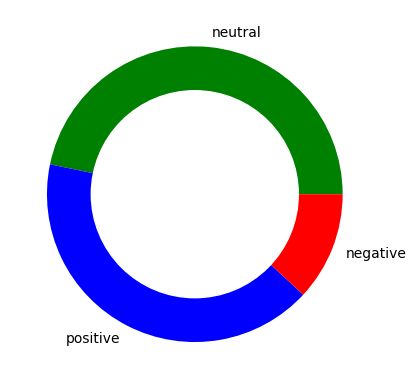

In [13]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,'sentiment')
names = pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
import os 
os.chdir(r"C:\Users\Mahesh S Valanju\Desktop") 

In [15]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open('amazon2.jpg'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=1000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

Word Cloud Saved Successfully


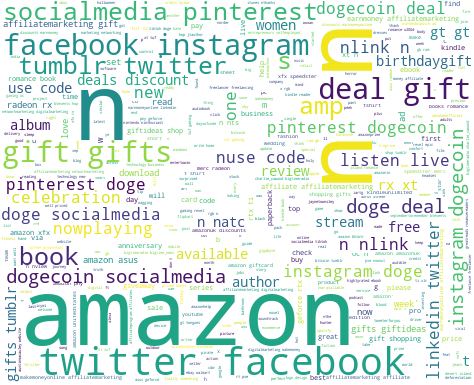

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list['text'].values)

Word Cloud Saved Successfully


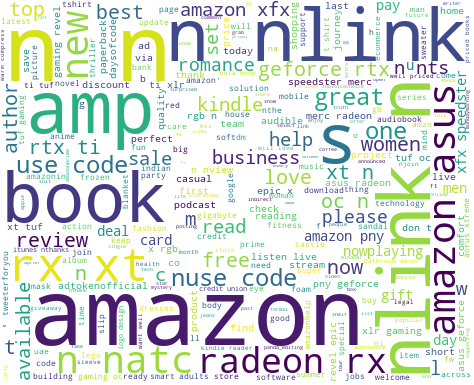

In [17]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive['text'].values)

Word Cloud Saved Successfully


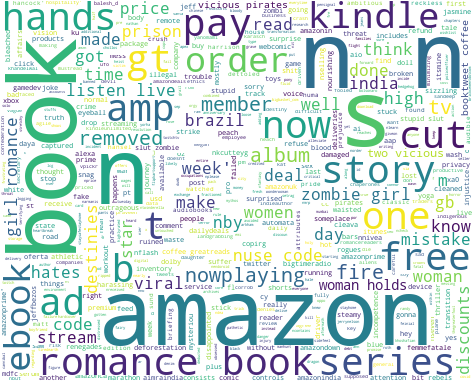

In [18]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative['text'].values)

In [19]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby('sentiment').text_len.mean()),2)

,text_len
sentiment,
negative,107.71
neutral,106.89
positive,107.91


In [20]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.32
neutral,13.54
positive,16.95


In [21]:
#Removing Punctuation
def remove_punct(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,🔥 AMAZON : PowerColor Radeon RX 6800 XT RED DR...,🔥 amazon : powercolor radeon rx xt red dr...,0.000000,0.0000,positive,NaN,NaN,NaN,NaN,69,11,🔥 amazon powercolor radeon rx xt red dra...,"[, amazon, powercolor, radeon, rx, xt, red, dr...","[, amazon, powercolor, radeon, rx, xt, red, dr...","[, amazon, powercolor, radeon, rx, xt, red, dr..."
1,RT @InspireNCelebr8: AD: Love learning #beauty...,ad: love learning #beauty secrets? watch my r...,0.284091,0.4625,positive,NaN,NaN,NaN,NaN,120,19,ad love learning beauty secrets watch my rece...,"[, ad, love, learning, beauty, secrets, watch,...","[, ad, love, learning, beauty, secrets, watch,...","[, ad, love, learn, beauti, secret, watch, rec..."
2,RT @reviews_chat: **FREE CHROME EXTENSION** Re...,**free chrome extension** reviews chat helps ...,0.400000,0.6500,positive,NaN,NaN,NaN,NaN,123,19,free chrome extension reviews chat helps you ...,"[, free, chrome, extension, reviews, chat, hel...","[, free, chrome, extension, reviews, chat, hel...","[, free, chrome, extens, review, chat, help, f..."
3,RT @RaelleLogan1: One Woman Holds the Destinie...,one woman holds the destinies of two vicious ...,-1.000000,1.0000,negative,NaN,NaN,NaN,NaN,123,19,one woman holds the destinies of two vicious ...,"[, one, woman, holds, the, destinies, of, two,...","[, one, woman, holds, destinies, two, vicious,...","[, one, woman, hold, destini, two, viciou, pir..."
4,Software Development Engineer\nfrom Amazon\n#A...,software development engineer\nfrom amazon\n#a...,0.000000,0.0000,positive,NaN,NaN,NaN,NaN,57,7,software development engineer\nfrom amazon\nam...,"[software, development, engineer, from, amazon...","[software, development, engineer, amazon, amaz...","[softwar, develop, engin, amazon, amazon, job, ]"


In [22]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

#1281 Number of reviews has 2966 words

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

849 Number of reviews has 2922 words


,,aap,abduct,abnett,abo,absolut,abstract,academ,academi,access,...,𝒄𝒉𝒐𝒐𝒔𝒆,𝒕𝒐,𝒟𝒾𝑒𝒷𝒪,𝟎,𝟏𝟒,𝟐,𝟐𝟗𝟗𝟗𝟎,𝟑,𝟒,𝟗
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
amazon,436
gift,229
deal,133
twitter,110
socialmedia,107
instagram,105
facebook,104
dogecoin,98
doge,98
pinterest,94


In [24]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('twitter facebook', 97),
 ('facebook instagram', 97),
 ('deal gift', 92),
 ('gift gifts', 87),
 ('socialmedia pinterest', 86),
 ('use code', 58),
 ('tumblr twitter', 49),
 ('dogecoin socialmedia', 49),
 ('doge deal', 49),
 ('instagram dogecoin', 48),
 ('pinterest dogecoin', 44),
 ('pinterest doge', 44),
 ('linkedin twitter', 43),
 ('doge socialmedia', 43),
 ('dogecoin deal', 43),
 ('instagram doge', 42),
 ('listen live', 34),
 ('rx xt', 25),
 ('gt gt', 23),
 ('link atc', 20)]

In [25]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('twitter facebook instagram', 91),
 ('deal gift gifts', 79),
 ('tumblr twitter facebook', 46),
 ('facebook instagram dogecoin', 45),
 ('instagram dogecoin socialmedia', 45),
 ('doge deal gift', 45),
 ('pinterest dogecoin deal', 41),
 ('pinterest doge deal', 41),
 ('socialmedia pinterest dogecoin', 41),
 ('socialmedia pinterest doge', 41),
 ('linkedin twitter facebook', 40),
 ('doge socialmedia pinterest', 40),
 ('dogecoin socialmedia pinterest', 40),
 ('facebook instagram doge', 39),
 ('instagram doge socialmedia', 39),
 ('dogecoin deal gift', 39),
 ('radeon rx xt', 18),
 ('gift gifts giftideas', 18),
 ('listen live stream', 17),
 ('gt gt gt', 16)]